Para colocar um gráfico sem nenhuma relação com o de fora, basta criar um axe (chamando fig.add_axes)

*fig.add_axes - Os parâmetros são frações das dimensões da figura original*

O plot resultante não está no mesmo "plano" do outro


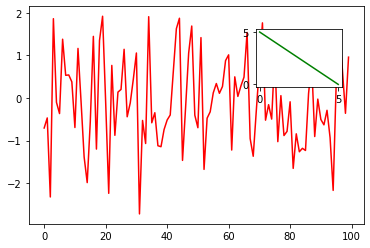

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

#Change left para valores próximos de 1 para movê-lo para a direita
#Change bottom para valores próximos de 1 para movê-lo para cima

#Change width, height para alterar a largura e altura do bloco que está dentro do plot
left, bottom, width, height = [0.65, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

num_points = 100
x = np.arange(num_points)
y = np.random.normal(size=num_points)
ax1.plot(x, y, color='red')
ax2.plot(range(6)[::-1], color='green')

plt.show()

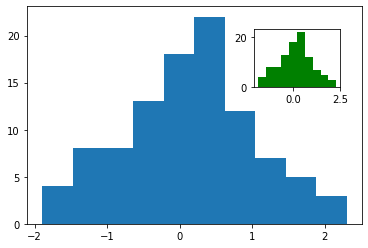

In [2]:
#Funciona com a maioria dos plots (não testei todos)
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()


left, bottom, width, height = [0.65, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

num_points = 100
x = np.arange(num_points)
y = np.random.normal(size=num_points)
#ax1.plot(x, y, color='red')
ax1.hist(y, bins = 10)
ax2.hist(y, bins = 10, color='green')
#ax2.plot(range(6)[::-1], color='green')

plt.show()

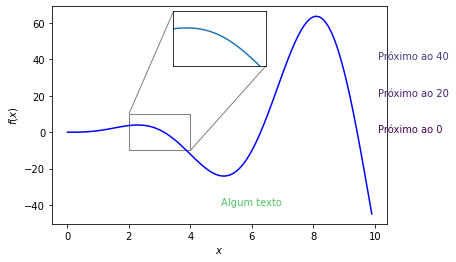

In [3]:
import numpy as np
from math import sin, cos
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes

tamanho = 10

x = np.arange(0,tamanho,0.1)
y = x * x * np.sin(x)

fig, ax1 = plt.subplots()
ax1.plot(x, y, color='blue')




#O 1.5 representa o tamanho da caixa, ou o zoom aplicado
#loc representa controla a posição da caixa (só aceita valores inteiros), 
#caso seja preciso colocar em um lugar específico tem que pesquisar
axins = zoomed_inset_axes(ax1, 1.5, loc=9)

axins.plot(x, y, label = 'label1')

#x1, x2 são o x inicial e x final que ficará dentro do zoom
#y1, y2 são o y inicial e y final que ficará dentro do zoom
x1, x2, y1, y2 = 2, 4, -10, 10

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

#Remove as réguas do eixo x e y da caixa de zoom
axins.axes.get_xaxis().set_visible(False)
axins.axes.get_yaxis().set_visible(False)

#loc1 e loc2 representam as retas entre os vértices da área de zoom e o box do zoom
#alterá-los altera de qual vértice sai
mark_inset(ax1, axins, loc1=2, loc2=4, fc="none", ec="0.5")

#Cores variando uniforme
color = plt.get_cmap('viridis')(np.linspace(0, 1, 12))

xmax = 10
ax1.text(1.01*xmax, 0, 'Próximo ao 0', color=color[0])
ax1.text(1.01*xmax, 20, 'Próximo ao 20', color=color[1])
ax1.text(1.01*xmax, 40, 'Próximo ao 40', color=color[2])


ax1.text(5, -40, 'Algum texto', color=color[8])

#r$ é para a mudar a fonte
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$f(x)$')
plt.show()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


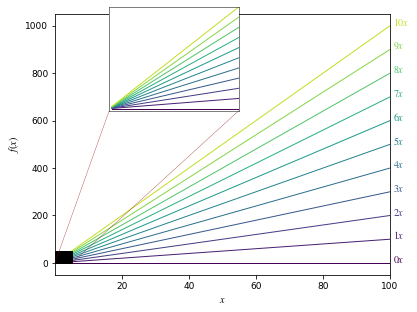

In [4]:
#CREDITS for https://pacinispace.blogspot.com/2017/07/matplotlib-insets-aligned-legends.html

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from cycler import cycler
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


plt.close('all')

# Create a list of colours from the colormap viridis
color = plt.get_cmap('viridis')(np.linspace(0, 1, 12))

# Set the settings to perform well in a IEEEtran document
params_IEEEtran = {'legend.fontsize': 10,
                   'axes.labelsize': 10,
                   'axes.titlesize': 10,
                   'xtick.labelsize': 9,
                   'ytick.labelsize': 9,
                   'mathtext.fontset': 'stix',
                   'font.family': 'Times New Roman',
                   'mathtext.rm': 'serif',
                   'mathtext.bf': 'serif:bold',
                   'mathtext.it': 'serif:italic',
                   'mathtext.sf': 'sans\\-serif',
                   'grid.color': 'k',
                   'grid.linestyle': ':',
                   'grid.linewidth': 0.5,
                   'axes.xmargin': 0,
                   'axes.axisbelow': False,
                   'lines.linewidth': 1.0,
                   'legend.frameon': False,
                   'axes.prop_cycle': cycler('color', color),
                   'figure.figsize': [3*2, 2.4*2],
                   }
plt.rcParams.update(params_IEEEtran)

# Create some sample data
x = np.linspace(0.1, 100)[:, np.newaxis]
e = np.arange(0, 11, 1)[np.newaxis, :]
y = e*x

# Main plot
fig = plt.figure('FIG')
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)

# Put labels outside the plot
xmax = max(x)
#PARAMETERS:
#posiçãox (1.01*max(x) do lado de fora), y[-1, x] é onde a reta termina
#r-Cifrão muda a fonte
#Executado dentro de um array pois são várias linhas
text = [ax.text(1.01*xmax, y[-1, x], r'$' + str(x) + r'x$',
                color=color[n]) for (n, x) in enumerate(e[0, :])]

# Create the inset
inset = fig.add_axes([0.25, 0.6, 0.3, 0.3])  # Fraction of figure size (3, 2.4)
inset.axes.get_xaxis().set_visible(False)
inset.axes.get_yaxis().set_visible(False)
inset.plot(x, y)
[x.set_linewidth(0.5) for x in inset.spines.values()]
inset.set_xlim(0, 5)
inset.set_ylim(-1, 50)

# Create the box for the inset
box, c1, c2 = mark_inset(ax, inset, loc1=4, loc2=3, lw=0.3,
                         fc="none", ec=matplotlib.colors.hex2color('#900000'),
                         zorder=200)
box.set_linewidth(1)
box.set_color('k')

# Set the axis labels
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')


pass